## Skripsie Doc 1
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from sklearn import gaussian_process
from numpy.linalg import inv

### Multidimensional Gaussian

In [2]:
mu = [0,0]
print(mu)
vari1 = [[1,0.8],[0.8,10]]
print(vari1)
#gaussian1 = Gaussian(mu,vari1).sample(1000000)
mean = np.array(mu); cov = np.array(vari1)
gaussian1 = np.random.multivariate_normal(mean.flatten(), cov, 1000000).T
#

print(gaussian1)

[0, 0]
[[1, 0.8], [0.8, 10]]
[[-1.07510805  1.34951194  0.3225059  ...,  0.53532999  0.92980389
   0.17988775]
 [-2.7719851   0.58633175 -4.28162377 ...,  5.02454623  2.41291874
   1.04698699]]


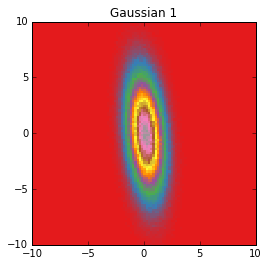

In [3]:
%matplotlib inline
#Provided code from Computer Science 315, modified
xbin = np.arange(-10,10,0.2)
ybin = np.arange(-10,10,0.2)

pl.title("Gaussian 1")
H,xedge,yedge = np.histogram2d(gaussian1[0], gaussian1[1], bins=[xbin,ybin], range = [[-10,10],[-10,10]],normed=False)
pl.imshow(H.T,cmap='Set1', extent = [-10,10,-10,10], interpolation='nearest')

### Cholesky

In [4]:
#cholesky covariance demo
vari2 = [[4,12,-16],[12,37,-43],[-16,-43,98]]
print(vari2)
gaussian2_LTM = np.linalg.cholesky(vari2)
print(gaussian2_LTM)
gaussian2_UTM = gaussian2_LTM.transpose()
print(gaussian2_UTM)

[[4, 12, -16], [12, 37, -43], [-16, -43, 98]]
[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]
[[ 2.  6. -8.]
 [ 0.  1.  5.]
 [ 0.  0.  3.]]


In [5]:
#multiply LTM with uncorrelated samples to get correlated samples
samples = np.zeros((2,1000000))
vari = [[1,0.8],[0.8,10]]
gaussian_LTM = np.linalg.cholesky(vari)
print("LTM = ")
print(gaussian_LTM)
for n in range (0,1000000):
    X = np.zeros((2,1))
    X[0,0] = np.random.normal(0,1)
    X[1,0] = np.random.normal(0,np.sqrt(10))
    #print("X = "),print(X)
    Y = np.dot(gaussian_LTM,X)
    #print("Y = "),print(Y)
    #samples[0,n] = np.random.normal(0,1)
    #samples[1,n] = np.random.normal(0,np.sqrt(10))
    samples[0,n] = Y[0,0]
    samples[1,n] = Y[1,0]
print("samples = ")
print(samples)

LTM = 
[[ 1.          0.        ]
 [ 0.8         3.05941171]]
samples = 
[[ -0.09946288   2.16238788   1.66828449 ...,  -1.33644626   1.54428021
    0.95243121]
 [ 13.96689283   1.25349668   9.19915514 ..., -10.45239706 -21.57800735
    7.01568553]]


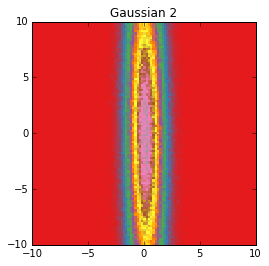

In [6]:
%matplotlib inline
#Provided code from Computer Science 315, modified
xbin = np.arange(-10,10,0.2)
ybin = np.arange(-10,10,0.2)
pl.title("Gaussian 2")
H,xedge,yedge = np.histogram2d(samples[0], samples[1], bins=[xbin,ybin], range = [[-10,10],[-10,10]],normed=False)
pl.imshow(H.T,cmap='Set1', extent = [-10,10,-10,10], interpolation='nearest')

$ c_c $